# Imports

In [3]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from os.path import exists

# Data Preprocessing

In [3]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# load train and test dataset
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
# scale pixels
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images
trainX = train_norm
testX = test_norm

# Creating a CNN



In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

C:\Users\Royden\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# fit our model
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
# save our model
model.save('mnist_cnn.h5')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9107 - loss: 0.2898 - val_accuracy: 0.9797 - val_loss: 0.0607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9822 - loss: 0.0586 - val_accuracy: 0.9840 - val_loss: 0.0474
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9860 - val_loss: 0.0394
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9943 - loss: 0.0208 - val_accuracy: 0.9839 - val_loss: 0.0474
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9968 - loss: 0.0128 - val_accuracy: 0.9864 - val_loss: 0.0383
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.9866 - val_loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9876 - val_loss: 0.0410
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9996 - loss: 0

In [4]:
model = keras.models.load_model("mnist_cnn.h5")

In [10]:
model.evaluate(testX, testY)
predY = model.predict(testX)
predY.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9840 - loss: 0.0545
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [11]:
y_predicted = []

for arr in predY:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [12]:
# Convert predicted probabilities to one-hot encoded format
y_predicted = np.argmax(predY, axis=1)

# printing the classification report
print(classification_report(np.argmax(testY, axis=1), y_predicted))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



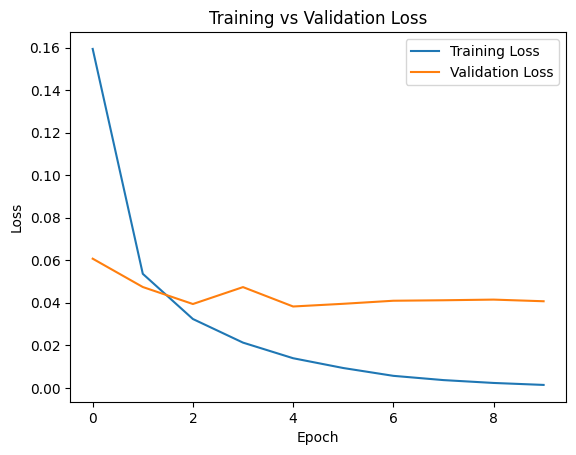

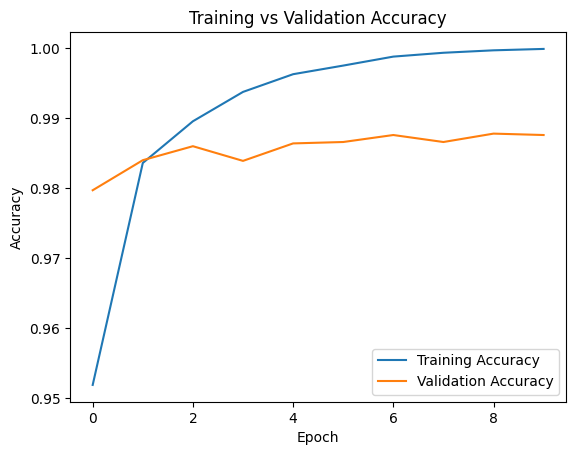

In [13]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

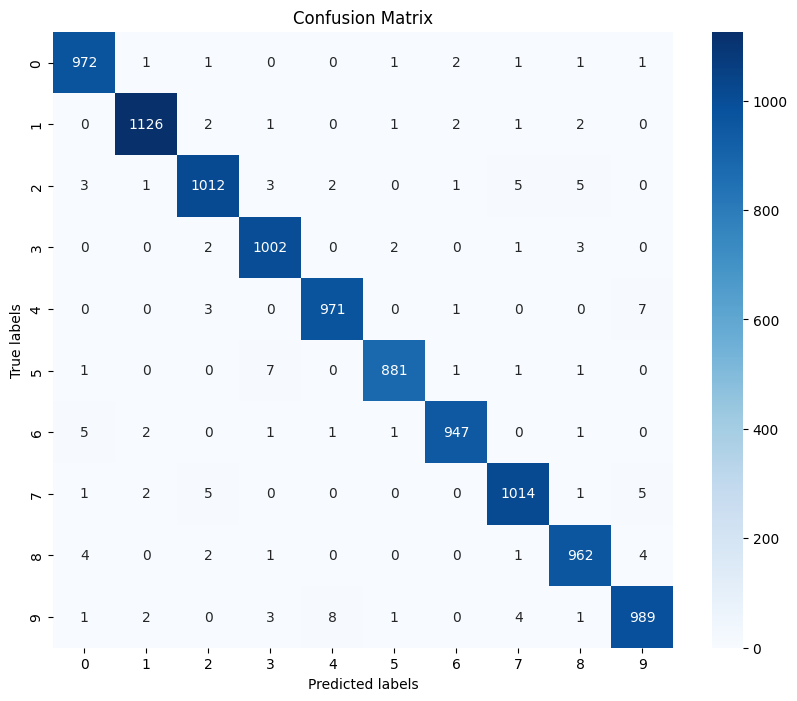

In [14]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(testY, axis=1), y_predicted)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [5]:
def find_contours(img):
    """ This function finds contours of the given image"""

    # Find edges by using Canny
    edged = cv2.Canny(img, 30, 150)

    # Find Contours
    contours, _= cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Sort out contours left to right by using their x cordinates
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    return contours

def get_predictions(img, contours):
    """This Functions get predictions from our model."""

    #Load the model, if it is not available, train the model.
    model_exists = exists('mnist_cnn.h5')
    if model_exists:
        classifier = load_model('mnist_cnn.h5')
    else:
        train.run()
        classifier = load_model('mnist_cnn.h5')

    # Create empty array to store entire number
    full_number = []

    # loop over the contours
    for c in contours:
        # compute the bounding box for the rectangle
        (x, y, w, h) = cv2.boundingRect(c)    
        
        # preprocess the image
        if w >= 5 and h >= 25:
            roi = img[y:y + h, x:x + w]
            ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY)
            roi = makeSquare(roi)
            roi = resize_to_pixel(28, roi)
            # cv2.imshow("ROI", roi)
            roi = roi / 255.0       
            roi = roi.reshape(1,28,28,1) 

            ## Get Prediction
            result = str(np.argmax(classifier.predict(roi, 1, verbose = 0)))
                
            # Update full_number array
            full_number.append(result)

            # Add rectangle and prediction for each digit in main window
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
            cv2.putText(img, result, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 0), 2)
            cv2.imshow('Window', img)
            cv2.waitKey()

    return full_number

def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))


def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed
    
    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = int((width - height)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square


def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions
    
    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg


In [6]:
drawing = False # true if mouse is pressed
ix,iy = -1,-1
# mouse callback function
def draw(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,(255,255,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(img,(x,y),5,(255,255,255),-1)     

# initialize the main window parameters
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('Window')
cv2.setMouseCallback('Window',draw)

# load our main window
while True:
    cv2.imshow('Window',img)
    k = cv2.waitKey(1)&0xFF

    if k==27: # 27 means esc key
        break
    elif k==13: # 13 means enter key 
        # [it's not necessary in this project, but] convert the main image to gray scale  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # Blur image    
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        contours = find_contours(blurred)
        preds = get_predictions(blurred, contours)

        result = "The number is: " + ''.join(preds)
        cv2.putText(img, result, (10, 20), cv2.FONT_HERSHEY_COMPLEX, 0.6, (255, 255, 0), 1)
        cv2.imshow('Window', img)
        break


    # break


cv2.waitKey()
cv2.destroyAllWindows()